# LDA Speech Classification

## Problem Statement

In order to implement LDA, first generate a dummy dataset (say IRIS dataset having 4 features) and the use LDA to decrease the number of features to one/two. Now using this modified dataset, try to learn a classifier to test the performance of LDA for dimensionality reduction.

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [12]:
iris = datasets.load_iris()
X = iris.data
Y = iris.target
print(iris.keys())
features = iris.feature_names
target_names = iris.target_names
print(features)
print(target_names)
colors = ["r", "g", "b"]

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']


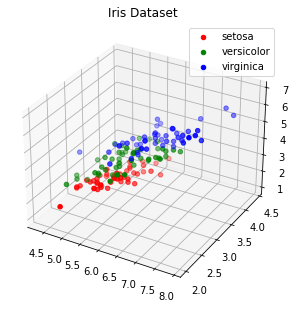

In [17]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111, projection= '3d')
plt.title("Iris Dataset")
for color, i, target_name in zip(colors , [0,1,2], target_names):
    ax.scatter(X[Y == i, 0], X[Y == i, 1], X[Y ==i, 2], color = color, label = target_name)
plt.legend(loc='best')
plt.show()

In [18]:
a =np.array([X[i] for i in range(len(Y)) if Y[i]==0])
b =np.array([X[i] for i in range(len(Y)) if Y[i]==1])
c =np.array([X[i] for i in range(len(Y)) if Y[i]==2])
print(a.shape, b.shape, c.shape)

(50, 4) (50, 4) (50, 4)


In [22]:
meanvector1= np.mean(a, axis=0)
print('Mean Vector class1:' + str(meanvector1))

meanvector2= np.mean(b, axis=0)
print('Mean Vector class2:' + str(meanvector2))

meanvector3= np.mean(c, axis=0)
print('Mean Vector class3:' + str(meanvector3))

meanvector = np.mean(X, axis = 0)
print('Dataset Mean Vector:' + str(meanvector))

Mean Vector class1:[5.006 3.428 1.462 0.246]
Mean Vector class2:[5.936 2.77  4.26  1.326]
Mean Vector class3:[6.588 2.974 5.552 2.026]
Dataset Mean Vector:[5.84333333 3.05733333 3.758      1.19933333]


In [23]:
c1 = np.cov(a.T)
print('Covariance Matrix for a:\n', c1)

c2 = np.cov(b.T)
print('Covariance Matrix for b:\n', c2)

c3 = np.cov(c.T)
print('Covariance Matrix for c:\n', c3)

SM = c1+c2+c3
print('Within Class Scatter Matric:\n', SM)

Covariance Matrix for a:
 [[0.12424898 0.09921633 0.0163551  0.01033061]
 [0.09921633 0.1436898  0.01169796 0.00929796]
 [0.0163551  0.01169796 0.03015918 0.00606939]
 [0.01033061 0.00929796 0.00606939 0.01110612]]
Covariance Matrix for b:
 [[0.26643265 0.08518367 0.18289796 0.05577959]
 [0.08518367 0.09846939 0.08265306 0.04120408]
 [0.18289796 0.08265306 0.22081633 0.07310204]
 [0.05577959 0.04120408 0.07310204 0.03910612]]
Covariance Matrix for c:
 [[0.40434286 0.09376327 0.3032898  0.04909388]
 [0.09376327 0.10400408 0.07137959 0.04762857]
 [0.3032898  0.07137959 0.30458776 0.04882449]
 [0.04909388 0.04762857 0.04882449 0.07543265]]
Within Class Scatter Matric:
 [[0.79502449 0.27816327 0.50254286 0.11520408]
 [0.27816327 0.34616327 0.16573061 0.09813061]
 [0.50254286 0.16573061 0.55556327 0.12799592]
 [0.11520408 0.09813061 0.12799592 0.1256449 ]]


In [25]:
mvd1= np.dot(np.matrix(meanvector1-meanvector).T, np.matrix(meanvector1-meanvector))

mvd2= np.dot(np.matrix(meanvector2-meanvector).T, np.matrix(meanvector2-meanvector))

mvd3= np.dot(np.matrix(meanvector3-meanvector).T, np.matrix(meanvector3-meanvector))
Sb = len(a)*mvd1+ len(b)*mvd2 + len(c)*mvd3
Sb

matrix([[ 63.21213333, -19.95266667, 165.2484    ,  71.27933333],
        [-19.95266667,  11.34493333, -57.2396    , -22.93266667],
        [165.2484    , -57.2396    , 437.1028    , 186.774     ],
        [ 71.27933333, -22.93266667, 186.774     ,  80.41333333]])

In [26]:
SM_1 = np.linalg.inv(SM)
print(SM_1)

[[ 3.61450625 -1.79239367 -2.9973073   1.13913034]
 [-1.79239367  4.74462637  0.88993336 -2.96876251]
 [-2.9973073   0.88993336  4.92973458 -2.96879206]
 [ 1.13913034 -2.96876251 -2.96879206 12.25745978]]


In [27]:
S = np.dot(SM_1, Sb)
print(S)

[[-149.86010018   52.98774958 -397.48421241 -169.47384374]
 [-272.52032387  106.73271449 -733.26598492 -309.07923578]
 [ 395.79450031 -144.19320857 1054.06795414  447.96116942]
 [ 514.35701152 -167.57287007 1349.87771599  580.44812336]]


In [29]:
eigenvals, eigenvecs = np.linalg.eig(S)
eigen_vals = []
for i in eigenvals:
    eigen_vals.append(round(i,4))
print(sorted(eigen_vals,reverse= True))

[1577.4045, 13.9842, 0.0, -0.0]


In [30]:
Q_hat_2 = eigenvecs[:,:2]

Q_hat_1 = eigenvecs[:,:1]

In [31]:
X_transposed_2 = np.dot(X, Q_hat_2)

X_transposed_1 = np.dot(X, Q_hat_1)

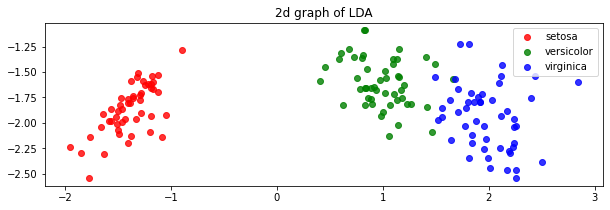

In [34]:
plt.figure(figsize=(10,3))
for color, i, target_name in zip(colors, [0,1,2], target_names):
    plt.scatter(np.ravel(X_transposed_2[Y == i, 0]), np.ravel(X_transposed_2[Y == i,1]), alpha=.8, color=color, label=target_name)

plt.legend(loc='best')
plt.title("2d graph of LDA")
plt.show()